<a href="https://colab.research.google.com/github/NayelySaldivar/-lab-discrete-probability-distribution-/blob/master/BasesDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Desafío Data México </h2>
<h4> <p> Segunda Edición - Datos con perspectiva de género </p> </h4> 

##### Importación de librerías:

In [10]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga y modificación de las bases:

### - Resultados Covid desde la plataforma **DataMexico**:

- Utilizamos la **DataMexico API Explorer** para obtener los datos actualizados:

In [12]:
data=requests.get('https://api.datamexico.org/tesseract/cubes/gobmx_covid/aggregate.jsonrecords?drilldowns%5B%5D=Death+Date.Death+Date.Death+Date&drilldowns%5B%5D=Covid+Result.Covid+Result.Covid+Result&drilldowns%5B%5D=Health+Institution+Attended.Health+Institution+Attended.Health+Institution+Attended&drilldowns%5B%5D=Pneumonia+Diagnose.Pneumonia+Diagnose.Pneumonia+Diagnose&drilldowns%5B%5D=COPD+Diagnose.COPD+Diagnose.COPD+Diagnose&drilldowns%5B%5D=Asthma+Diagnose.Asthma+Diagnose.Asthma+Diagnose&drilldowns%5B%5D=Inmunosupresion+Diagnose.Inmunosupresion+Diagnose.Inmunosupresion+Diagnose&drilldowns%5B%5D=Hypertension+Diagnose.Hypertension+Diagnose.Hypertension+Diagnose&drilldowns%5B%5D=Cardiovascular+Diagnose.Cardiovascular+Diagnose.Cardiovascular+Diagnose&drilldowns%5B%5D=Obesity+Diagnose.Obesity+Diagnose.Obesity+Diagnose&drilldowns%5B%5D=Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose&drilldowns%5B%5D=Diabetes+Diagnose.Diabetes+Diagnose.Diabetes+Diagnose&drilldowns%5B%5D=State+Patient+Attended.State+Patient+Attended.State+Patient+Attended&drilldowns%5B%5D=State+Patient+Origin.State+Patient+Origin.State+Patient+Origin&drilldowns%5B%5D=Sex.Sex.Sex&drilldowns%5B%5D=Age+Group.Age+Group.Age&drilldowns%5B%5D=Municipality+Patient+Residence.Geography.Municipality&measures%5B%5D=Cases&parents=false&sparse=false')
data_api=pd.DataFrame(data.json()["data"])

In [13]:
data_api.head(3)

,Death Date ID,Death Date,Covid Result ID,Covid Result,Health Institution Attended ID,Health Institution Attended,Pneumonia Diagnose ID,Pneumonia Diagnose,COPD Diagnose ID,COPD Diagnose,Asthma Diagnose ID,Asthma Diagnose,Inmunosupresion Diagnose ID,Inmunosupresion Diagnose,Hypertension Diagnose ID,Hypertension Diagnose,Cardiovascular Diagnose ID,Cardiovascular Diagnose,Obesity Diagnose ID,Obesity Diagnose,Chronic Kidney Failure Diagnose ID,Chronic Kidney Failure Diagnose,Diabetes Diagnose ID,Diabetes Diagnose,State Patient Attended ID,State Patient Attended,State Patient Origin ID,State Patient Origin,Sex ID,Sex,Age,Municipality ID,Municipality,Cases
0,20200102,2020-01-02,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,2,No,1,Yes,2,No,2,No,2,No,2,No,2,No,9,Ciudad de México,9,Ciudad de México,2,Female,65,9007,Iztapalapa,1
1,20200103,2020-01-03,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,1,Yes,2,No,2,No,2,No,2,No,2,No,2,No,2,Baja California,2,Baja California,1,Male,15,2004,Tijuana,1
2,20200103,2020-01-03,2,Non Positive SARS-CoV-2,4,IMSS,99,Not Specified,2,No,2,No,2,No,2,No,2,No,1,Yes,2,No,1,Yes,5,Coahuila de Zaragoza,5,Coahuila de Zaragoza,2,Female,67,5030,Saltillo,1


In [14]:
data_api.shape

(263200, 34)

### - Datos históricos de **Mortalidad 2012-2019** del INEGI:

In [15]:
# hist_muertes=pd.read_csv(f'defunciones_generales_{2012}.csv')
hist_muertes=pd.read_csv(f'/content/drive/MyDrive/DesafioData/defunciones_generales_{2012}.csv')
hist_muertes['date']='2012'

for i in range(2013,2020):
    aux=pd.read_csv(f'/content/drive/MyDrive/DesafioData/defunciones_generales_{i}.csv')
    # aux=pd.read_csv(f'defunciones_generales_{i}.csv')
    aux['date']=i
    hist_muertes=pd.concat([hist_muertes,aux])

hist_muertes=hist_muertes.reset_index(drop=True)

In [16]:
hist_muertes.tail(3)

,ent_regis,mun_regis,causa_def,lista_mex,sexo,edad,mes_regis,ocupacion,escolarida,edo_civil,ocurr_trab,asist_medi,nacionalid,derechohab,embarazo,rel_emba,area_ur,date
5374487,32,56,X999,55,1,4998,12,99,99,9,8,9,9,99,8,8,9,2019
5374488,32,37,X954,55,1,4998,12,99,99,9,8,9,9,99,8,8,9,2019
5374489,32,56,J09X,33C,2,4061,2,11,4,5,8,1,1,7,8,8,1,2019


In [17]:
hist_muertes[hist_muertes['date']==2019].shape

(747784, 18)

Transformamos el formato de la **edad**:

In [18]:
hist_muertes['edad_real']=np.where(hist_muertes['edad']>4000,hist_muertes['edad']-4000,-1)
# hist_muertes[hist_muertes['edad_real']==-1]

Eliminamos los registros que carecen de esta información ya que también cuentan con vacíos en otras variables:

In [19]:
rows_sin_edad=list(hist_muertes[hist_muertes['edad_real']==-1].index)
print(f'Coincidencias: {len(rows_sin_edad)}')
print(f'Shape Inicial:{hist_muertes.shape}')
hist_muertes=hist_muertes.drop(rows_sin_edad,axis=0)
print(f'Shape Final:{hist_muertes.shape}')

hist_muertes=hist_muertes.reset_index(drop=True)

Coincidencias: 205810
Shape Inicial:(5374490, 19)
Shape Final:(5168680, 19)


Nuestra investigación se concentra en el estudio de la población femenina por lo que es necesario limpiar también la variable de **sexo**:

In [20]:
rows_sin_sex=list(hist_muertes[hist_muertes['sexo']==9].index)

print(f'Coincidencias: {len(rows_sin_sex)}')
print(f'Shape Inicial:{hist_muertes.shape}')
hist_muertes=hist_muertes.drop(rows_sin_sex,axis=0)
print(f'Shape Final:{hist_muertes.shape}')

hist_muertes=hist_muertes.reset_index(drop=True)

Coincidencias: 2408
Shape Inicial:(5168680, 19)
Shape Final:(5166272, 19)


### - Catálogo de enfermedades según la **CIE - 10**

Concatenamos todas las incidencias:

In [21]:
cat_enfermedad=pd.read_csv(f'/content/drive/MyDrive/DesafioData/decatcausa{2012}.csv', encoding='latin-1')

for i in range(2013,2020):
    aux=pd.read_csv(f'/content/drive/MyDrive/DesafioData/decatcausa{i}.csv',encoding='latin-1')
    cat_enfermedad=pd.concat([cat_enfermedad,aux])
    
cat_enfermedad=cat_enfermedad.reset_index()

Creamos los diccionarios para encontrar las claves únicas:

In [22]:
claves_duplicadas={}

for i in range(len(cat_enfermedad)):
    claves_duplicadas[cat_enfermedad['CVE'][i]]=str(cat_enfermedad['DESCRIP'][i])
    
dict_no_duplicados = {} 
for key, value in claves_duplicadas.items(): 
    if not value in dict_no_duplicados.values(): 
        dict_no_duplicados[key] = value 

Archivamos para usar en el script principal:

In [23]:
claves=pd.DataFrame(list(dict_no_duplicados.keys()),columns=['Clave'])  

desc=[]
for i in claves['Clave'][:-1]:
    desc.append(dict_no_duplicados[str(i)])
    
descr=pd.DataFrame(pd.Series(desc),columns=['Dictamen'])

catalogo_completo=pd.concat([claves,descr],axis=1)

catalogo_completo.to_csv('Catalogo_CIE_10.csv')

#### - Segmentación de padecimientos

In [24]:
EPOC=["J44"+str(i) for i in range(0,10)]

asma=["J450","J451","J458","J459","J46X"]
# cardiovascular=["I0"+str(i)+str(j) for i in range(5,10) for j in range(0,10)]+\ # Cardiopatía reumática
# ["I10X"]+["I1"+str(i)+str(j) for i in range(0,6) for j in range(0,10)]+\ # Hipertensión Arterial
# ["I42X"]+["I42"+str(i)+str(j)  for i in range(0,10) for j in range(0,10)]+\ # Miocardiopatías
# ["I50X"]+["I50"+str(i)+str(j)  for i in range(0,10) for j in range(0,10)]+\ # Insuficiencia cardiaca
# ["I60X"]+["I"+str(i)+str(j)  for i in range(60,70) for j in range(0,10)] +\ # Enfermedad cerebrovascular
# ["I70X","I80X"]+["I"+str(i)+str(j)  for i in range(70,90) for j in range(0,10)] +\ # Enfermedad vascular perifería
# ["Q20X"]+["Q2"+str(i)+str(j)  for i in range(0,9) for j in range(0,10)] # Cardiopatía congénita

cardiovascular=["I0"+str(i)+str(j) for i in range(5,10) for j in range(0,10)]+ \
["I20X"]+["I2"+str(i)+str(j) for i in range(0,6) for j in range(0,10)]+ \
["I42X"]+["I42"+str(i) for i in range(0,10)]+\
["I50X"]+["I50"+str(i)  for i in range(0,10)]+\
["I60X"]+["I"+str(i)+str(j)  for i in range(60,70) for j in range(0,10)] +\
["I70X","I80X"]+["I"+str(i)+str(j)  for i in range(70,90) for j in range(0,10)] +\
["Q20X"]+["Q2"+str(i)+str(j)  for i in range(0,9) for j in range(0,10)] 

hipertension=['G932','I270','I272','K766','O10X','O11X','O13X','O14X','O16X','P292']+ \
["I10X"]+["I1"+str(i)+str(j) for i in range(0,6) for j in range(0,10)]+ \
["O"+str(i)+str(j) for i in range(10,15) for j in range(0,10)]+\
["O16"+str(i) for i in range(0,10)]

diabetes=["E1"+str(i)+str(j) for i in range(0,5) for j in range(0,10)]+['E232','N251','P702']+["O24"+str(i) for i in range(0,10)]

neumonia=["J1"+str(i)+str(j) for i in range(0,9) for j in range(0,10)]+['J851']+["P23"+str(i) for i in range(0,10)]

insuf_renal=["N1"+str(i)+str(j) for i in range(7,10) for j in range(0,10)]+["I17X","I18X","I19X"]+['P960']

obesidad=["E66"+str(i) for i in range(0,10)]

'''VIH [B20-B24] + Cáncer [C0-C97] + Rechazo de trasplantes [T86] ''' 
inmunosup=["B"+str(i)+str(j) for i in range(20,25) for j in range(0,10)]+['B24X','O987','R75X']+\
["C00"+str(i) for i in range(0,10)]+["C0"+str(i) for i in range(10,100)]+["C"+str(i)+str(j) for i in range(10,97) for j in range(0,10)]+\
["D00"+str(i) for i in range(0,10)]+["D0"+str(i) for i in range(10,100)]+\
["D"+str(i)+str(j) for i in range(80,90) for j in range(0,10)]+\
["T86"+str(i) for i in range(0,10)]

Añadimos el grupo a la base de mortalidad:

In [25]:
hist_muertes['gpo_enfermedad']=np.where(hist_muertes['causa_def'].isin(EPOC),'EPOC',
                                               np.where(hist_muertes['causa_def'].isin(asma),'asma',
                                                 np.where(hist_muertes['causa_def'].isin(cardiovascular),'cardiovascular',
                                                   np.where(hist_muertes['causa_def'].isin(hipertension),'hipertension',
                                                     np.where(hist_muertes['causa_def'].isin(diabetes),'diabetes',
                                                       np.where(hist_muertes['causa_def'].isin(neumonia),'neumonia',
                                                         np.where(hist_muertes['causa_def'].isin(insuf_renal),'insuf_renal',
                                                           np.where(hist_muertes['causa_def'].isin(obesidad),'obesidad',
                                                              np.where(hist_muertes['causa_def'].isin(inmunosup),'inmunosupresores','otros'
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )
                                             )

In [26]:
# hist_muertes[['gpo_enfermedad','causa_def']].head(3)
# hist_muertes.groupby(['gpo_enfermedad','sexo'])['edad'].count()

### - **Regiones Nielsen**

**Área I: Pacífico** - Baja California Norte, Baja California Sur, Sonora, Sinaloa, Nayarit (5) - [2, 3, 26, 25, 18]

**Área II: Norte** - Chihuahua, Coahuila, Durango, Nuevo León, San Luis Potosí,Tamaulipas, Zacatecas (7) - [8, 5, 10, 19, 24, 28, 32]

**Área III: Bajío** -  Aguascalientes, Jalisco, Guanajuato, Colima, Michoacan (5) - [1, 14, 11, 6, 16]

**Área IV: Centro** - Hidalgo, Querétaro, Morelos, Edo. México, Tlaxcala, Puebla, Guerrero (7) - [13, 22, 17, 15, 29, 21, 12]

**Área V**: Valle de México - Cdmx (1) - [9]


**Área VI**: Sureste - Chiapas, Campeche, Yucatan, Quintana Roo, Veracruz, Oaxaca, Tabasco (7) - [7, 4, 31, 23, 30, 20, 27]

In [27]:
pacifico = [2, 3, 26, 25, 18]
norte = [8, 5, 10, 19, 24, 28, 32]
bajio = [1, 14, 11, 6, 16]
centro = [13, 22, 17, 15, 29, 21, 12]
vallem = [9]
sureste = [7, 4, 31, 23, 30, 20, 27]

Añadimos la región a la base de mortalidad:

In [28]:
hist_muertes['region']=np.where(hist_muertes['ent_regis'].isin(pacifico),'pacifico',
                                      np.where(hist_muertes['ent_regis'].isin(norte),'norte',
                                               np.where(hist_muertes['ent_regis'].isin(bajio),'bajio',
                                                np.where(hist_muertes['ent_regis'].isin(centro),'centro',
                                                         np.where(hist_muertes['ent_regis'].isin(vallem),'vallem',
                                                             np.where(hist_muertes['ent_regis'].isin(sureste),'sureste','revisar' 
                                                                  )
                                                             )
                                                       )
                                                  )
                                              )
                                        )

In [29]:
hist_muertes.groupby('region')['edad'].count()

region
bajio        878828
centro      1284247
norte        922959
pacifico     469595
sureste     1047342
vallem       563301
Name: edad, dtype: int64

Archivamos los cambios para usar en el script principal:

In [30]:
hist_muertes.to_csv("Bases_INEGI.csv")

### - Resultados de **Censo Nacional de Población 2020** realizado por el INEGI:

In [31]:
# inegi2020=pd.read_csv('/content/drive/MyDrive/DesafioData/inegi2020_con_clavegeo.csv')

### - **Extracto de Mujeres** del histórico de mortalidad:

In [32]:
mortalidad_mujeres=hist_muertes[hist_muertes['sexo']==2]
mortalidad_mujeres.to_csv('Bases_INEGI_Mujeres.csv')

In [33]:
mortalidad_mujeres.shape

(2272081, 21)

In [34]:
hist_muertes.shape

(5166272, 21)

### - Tranformación para el modelo

In [35]:
!pip install feature_engine

Debido a la cantidad de datos y los recursos con los que contamos, decidimos tomar el último quiquenio que tenemos registrado en e histórico de muertes para crear nuestro modelo de ML

In [36]:
data_mujeres_quinquenio = mortalidad_mujeres[mortalidad_mujeres['date'].isin([2015,2016,2017,2018,2019])].reset_index(drop=True)

Volvemos dummies las variables de los grupos de enfermedad:

In [37]:
data_mujeres=data_mujeres_quinquenio['gpo_enfermedad']

In [38]:
dum_df = pd.get_dummies(data_mujeres, columns=['gpo_enfermedad'], prefix="Gpo_Enfermedad_is")
# dum_df.head(3)

Guardamos las variables que coinciden con la base de COVID:

In [39]:
data_mujeres=pd.concat([dum_df,data_mujeres_quinquenio[['sexo','edad_real','derechohab','ent_regis','mun_regis']]],axis=1)
data_mujeres.head(2)

,Gpo_Enfermedad_is_EPOC,Gpo_Enfermedad_is_asma,Gpo_Enfermedad_is_cardiovascular,Gpo_Enfermedad_is_diabetes,Gpo_Enfermedad_is_hipertension,Gpo_Enfermedad_is_inmunosupresores,Gpo_Enfermedad_is_insuf_renal,Gpo_Enfermedad_is_neumonia,Gpo_Enfermedad_is_obesidad,Gpo_Enfermedad_is_otros,sexo,edad_real,derechohab,ent_regis,mun_regis
0,0,0,0,0,0,0,0,0,0,1,2,40,7,1,1
1,0,0,0,0,0,0,0,0,0,1,2,66,2,1,1


In [40]:
rows_to_drop=data_mujeres[data_mujeres['Gpo_Enfermedad_is_otros']==1].index
data_mujeres_limpia=data_mujeres.copy()

print(f'Shape Inicial: {data_mujeres_limpia.shape}')
data_mujeres_limpia=data_mujeres_limpia.drop(rows_to_drop,axis=0).reset_index(drop=True)
data_mujeres_limpia=data_mujeres_limpia.drop('Gpo_Enfermedad_is_otros',axis=1)
print(f'Shape Inicial: {data_mujeres_limpia.shape}')

Shape Inicial: (1488372, 15)
Shape Inicial: (988232, 14)


Datos Covid-19

In [41]:
data=requests.get('https://api.datamexico.org/tesseract/cubes/gobmx_covid/aggregate.jsonrecords?drilldowns%5B%5D=Death+Date.Death+Date.Death+Date&drilldowns%5B%5D=Covid+Result.Covid+Result.Covid+Result&drilldowns%5B%5D=Health+Institution+Attended.Health+Institution+Attended.Health+Institution+Attended&drilldowns%5B%5D=Pneumonia+Diagnose.Pneumonia+Diagnose.Pneumonia+Diagnose&drilldowns%5B%5D=COPD+Diagnose.COPD+Diagnose.COPD+Diagnose&drilldowns%5B%5D=Asthma+Diagnose.Asthma+Diagnose.Asthma+Diagnose&drilldowns%5B%5D=Inmunosupresion+Diagnose.Inmunosupresion+Diagnose.Inmunosupresion+Diagnose&drilldowns%5B%5D=Hypertension+Diagnose.Hypertension+Diagnose.Hypertension+Diagnose&drilldowns%5B%5D=Cardiovascular+Diagnose.Cardiovascular+Diagnose.Cardiovascular+Diagnose&drilldowns%5B%5D=Obesity+Diagnose.Obesity+Diagnose.Obesity+Diagnose&drilldowns%5B%5D=Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose&drilldowns%5B%5D=Diabetes+Diagnose.Diabetes+Diagnose.Diabetes+Diagnose&drilldowns%5B%5D=State+Patient+Attended.State+Patient+Attended.State+Patient+Attended&drilldowns%5B%5D=State+Patient+Origin.State+Patient+Origin.State+Patient+Origin&drilldowns%5B%5D=Sex.Sex.Sex&drilldowns%5B%5D=Age+Group.Age+Group.Age&drilldowns%5B%5D=Municipality+Patient+Residence.Geography.Municipality&measures%5B%5D=Cases&parents=false&sparse=false')
data_api=pd.DataFrame(data.json()["data"])
print(data_api.shape)

(263200, 34)


In [42]:
# data_api.head(2)

Homologamos los valores dummies de la base:

In [43]:
enfermedades=['Pneumonia Diagnose ID','COPD Diagnose ID','Asthma Diagnose ID','Inmunosupresion Diagnose ID','Hypertension Diagnose ID','Cardiovascular Diagnose ID','Obesity Diagnose ID','Chronic Kidney Failure Diagnose ID','Diabetes Diagnose ID']

for enf in enfermedades:

  data_api[enf]=np.where(data_api[enf]==1,1,0)

In [44]:
# Orden de las columnas
# columnas_ml=['EPOC','Asma','Cardiovascular','Diabetes','Hipertension','Inmunosupresion','Inf_Renal','Neumonia','Obesidad','Sexo','Edad','Institucion','Estado','Municipio']
data_api_ml_completo=data_api[['COPD Diagnose ID','Asthma Diagnose ID','Cardiovascular Diagnose ID','Diabetes Diagnose ID','Hypertension Diagnose ID','Inmunosupresion Diagnose ID','Chronic Kidney Failure Diagnose ID','Pneumonia Diagnose ID','Obesity Diagnose ID','Sex ID','Age','Health Institution Attended','State Patient Attended ID','Municipality ID']]

In [45]:
data_api_ml_completo['Health Institution Attended']=np.where(
    data_api_ml_completo['Health Institution Attended']=='IMSS',2,np.where(
    data_api_ml_completo['Health Institution Attended']=='ISSSTE',3,np.where(
    data_api_ml_completo['Health Institution Attended']=='PEMEX',4,np.where(
    data_api_ml_completo['Health Institution Attended']=='SEDENA',5,np.where(
    data_api_ml_completo['Health Institution Attended']=='SEMAR',6,np.where(
    data_api_ml_completo['Health Institution Attended']=='IMSS-Bienestar',7,8    
    )    
    )
    )    
    )    
    )
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
data_api_ml_completo.head()

,COPD Diagnose ID,Asthma Diagnose ID,Cardiovascular Diagnose ID,Diabetes Diagnose ID,Hypertension Diagnose ID,Inmunosupresion Diagnose ID,Chronic Kidney Failure Diagnose ID,Pneumonia Diagnose ID,Obesity Diagnose ID,Sex ID,Age,Health Institution Attended,State Patient Attended ID,Municipality ID
0,0,0,0,0,0,1,0,0,0,2,65,2,9,9007
1,0,1,0,0,0,0,0,0,0,1,15,2,2,2004
2,0,0,0,1,0,0,0,0,1,2,67,2,5,5030
3,0,0,0,0,0,0,0,0,0,1,32,2,26,26018
4,1,1,0,0,1,1,0,0,1,2,67,4,13,13070


In [47]:
# data_api_ml_completo.to_csv('Base_Covid_2003.csv')

## Unsupervised ML - Clusterización 

Tenemos nuestras bases completas, ahora hay que homologar el nombre de las columnas:

In [48]:
data_inegi_ml=data_mujeres_limpia.copy().drop('sexo',axis=1)
data_api_ml=data_api_ml_completo[data_api_ml_completo['Sex ID']==2].drop('Sex ID',axis=1).reset_index(drop=True)

columnas_ml=['EPOC','Asma','Cardiovascular','Diabetes','Hipertension','Inmunosupresion','Inf_Renal','Neumonia','Obesidad','Edad','Institucion','Estado','Municipio']
data_inegi_ml.columns=columnas_ml
data_api_ml.columns=columnas_ml

### K Means

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Con ayuda el elbow method buscamos el número de clusters óptimo para la partición:

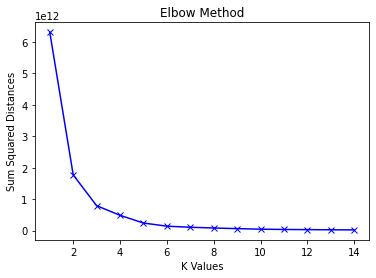

In [50]:
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(data_api_ml)
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

Identificamos 4 clusters

In [51]:
kmeans = KMeans(n_clusters=4)
data_api_clusters = kmeans.fit(data_api_ml)
preds = data_api_clusters.fit_predict(data_api_ml)

Marcamos cada cluster en la base con la columna **cluster**:

In [52]:
data_api_ml['Cluster']=preds
data_api_ml.head(2)

,EPOC,Asma,Cardiovascular,Diabetes,Hipertension,Inmunosupresion,Inf_Renal,Neumonia,Obesidad,Edad,Institucion,Estado,Municipio,Cluster
0,0,0,0,0,0,1,0,0,0,65,2,9,9007,0
1,0,0,0,1,0,0,0,0,1,67,2,5,5030,0


In [53]:
data_api_ml[data_api_ml.Cluster==0].Estado.value_counts()

9     14281
2      3951
8      3546
5      3373
1      1174
10     1078
7       706
3       624
6       576
15      524
4       502
26       60
27       44
19       41
13       30
14       19
31       18
21       16
30       13
25       11
22        8
32        7
16        5
11        5
20        4
18        4
17        4
12        3
24        2
23        2
29        1
Name: Estado, dtype: int64

### DBSCAN

In [54]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

Con ayuda de NN identificamos la distancia óptima

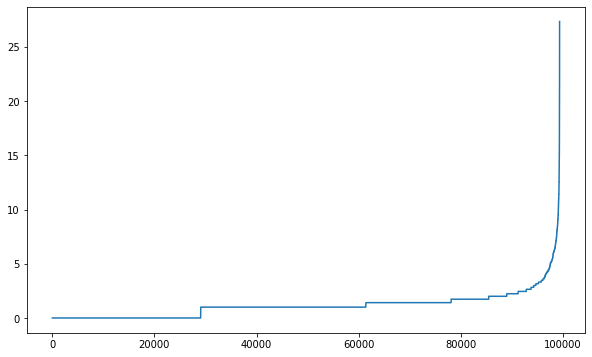

In [55]:
nearest_neighbors = NearestNeighbors(n_neighbors=100)
nearest_neighbors.fit(data_api_ml.drop('Cluster',axis=1))
distances, indices = nearest_neighbors.kneighbors(data_api_ml.drop('Cluster',axis=1))
distances = np.sort(distances, axis=0)[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.show()

Creamos el modelo:

In [56]:
m = DBSCAN(eps=3, min_samples=28)
m.fit(data_api_ml.drop('Cluster',axis=1))

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=28, n_jobs=None, p=None)

Creamos los cluster y etiquetamos el ruido.

In [57]:
#Asignar nuestros labels/clusters
labels = m.labels_

#Empezar a enmascarar nuestros datos
labels_mask_general = np.zeros_like(labels,dtype=bool)

#Colocar outliers como verdadero
labels_mask_general[m.core_sample_indices_] = True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Número de clusters: {n_clusters}')
print(f'Registros con ruido: {n_noise}')

Número de clusters: 121
Registros con ruido: 35776


In [58]:
data_api_ml['Cluster_DBSCAN']=labels
data_api_ml.head(2)

,EPOC,Asma,Cardiovascular,Diabetes,Hipertension,Inmunosupresion,Inf_Renal,Neumonia,Obesidad,Edad,Institucion,Estado,Municipio,Cluster,Cluster_DBSCAN
0,0,0,0,0,0,1,0,0,0,65,2,9,9007,0,0
1,0,0,0,1,0,0,0,0,1,67,2,5,5030,0,1


Analicemos los clusters:

### HDBSCAN

In [59]:
pip install hdbscan

In [60]:
import sklearn.cluster as cluster
import scipy.cluster.hierarchy as sch
import hdbscan
from random import sample 

Para la visualización del dendograma y visualizar los parámetros de clusterización tomaremos una muestra aleatoria de los datos:

In [63]:
muestra_hdbscan=data_api_ml.drop(['Cluster','Cluster_DBSCAN'],axis=1).sample(frac=.1)

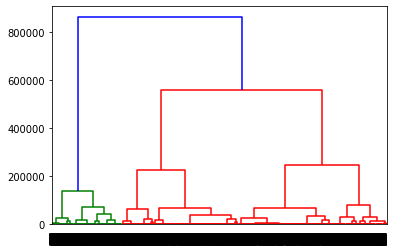

In [65]:
dendogram = sch.dendrogram(sch.linkage(muestra_hdbscan,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distancia Euclidiana')
plt.show()

Tomando la distancia vertical más larga y contando las veces que cruza con otras ramos, obtenemos que el tamaño minimo de los clusters debe ser de . 
Ejecutamos el modelo con esos parámetros:

In [66]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
m.fit(data_api_ml.drop(['Cluster','Cluster_DBSCAN'],axis=1))

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=28, n_jobs=None, p=None)

In [67]:
# Asignar nuestros labels/clusters
labels = m.labels_

# Empezar a enmascarar nuestros datos
labels_mask_general = np.zeros_like(labels,dtype=bool)

# Colocar outliers como verdadero
labels_mask_general[m.core_sample_indices_] = True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Número de clusters: {n_clusters}')
print(f'Registros con ruido: {n_noise}')

Número de clusters: 121
Registros con ruido: 35776


Asignamos los labels obtenidos:

In [68]:
data_api_ml['Cluster_HDBSCAN']=labels
data_api_ml.head(2)

,EPOC,Asma,Cardiovascular,Diabetes,Hipertension,Inmunosupresion,Inf_Renal,Neumonia,Obesidad,Edad,Institucion,Estado,Municipio,Cluster,Cluster_DBSCAN,Cluster_HDBSCAN
0,0,0,0,0,0,1,0,0,0,65,2,9,9007,0,0,0
1,0,0,0,1,0,0,0,0,1,67,2,5,5030,0,1,1


### GMM

In [70]:
from sklearn.mixture import GaussianMixture as GMM

Para obtener el número de componentes, obtenemos el valor de las 4 covarianzas.

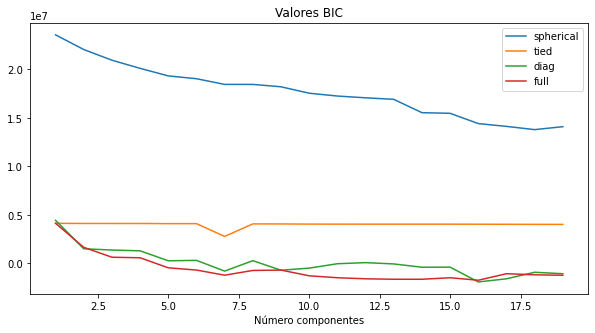

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

n_components = range(1, 20)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GMM(n_components=i, covariance_type=covariance_type, random_state=123)
        modelo = modelo.fit(data_api_ml.drop(['Cluster','Cluster_DBSCAN','Cluster_HDBSCAN'],axis=1))
        valores_bic.append(modelo.bic(data_api_ml.drop(['Cluster','Cluster_DBSCAN','Cluster_HDBSCAN'],axis=1)))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

Corremos el modelo con el número de componentes = . 

In [76]:
gm  = GMM(n_components=7, covariance_type='full')
gm.fit(data_api_ml.drop(['Cluster','Cluster_DBSCAN','Cluster_HDBSCAN'],axis=1))

labels = gm.predict(data_api_ml.drop(['Cluster','Cluster_DBSCAN','Cluster_HDBSCAN'],axis=1))
data_api_ml['Cluster_GMM']= labels
data_api_ml.head(2)

,EPOC,Asma,Cardiovascular,Diabetes,Hipertension,Inmunosupresion,Inf_Renal,Neumonia,Obesidad,Edad,Institucion,Estado,Municipio,Cluster,Cluster_DBSCAN,Cluster_HDBSCAN,Cluster_GMM
0,0,0,0,0,0,1,0,0,0,65,2,9,9007,0,0,0,1
1,0,0,0,1,0,0,0,0,1,67,2,5,5030,0,1,1,2


In [77]:
data_api_ml['Cluster_GMM'].value_counts()

2    74581
5     9949
1     5682
0     4263
6     3140
3     1404
4      327
Name: Cluster_GMM, dtype: int64

In [78]:
data_api_ml.to_csv('Cluster_Covid.csv')